**Working on a COVID Dataset**



In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly.express as px
import plotly.graph_objs as go
import plotly.io as pio
import math 
%matplotlib inline

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
df=pd.read_csv(r'/content/drive/MyDrive/Environment Hydrology Datasets/Country_Level_Info_Kaggle.csv')
df.head()

,Date,Country_Region,alpha-3_code,Population,Total_Confirmed_Cases,Total_Fatalities,Total_Recovered_Cases,New_Confirmed_Cases,New_Fatalities,New_Recovered_Cases,Remaining_Confirmed_Cases
0,2020-01-22,Afghanistan,AFG,37172386,0,0,0,0,0,0,0
1,2020-01-22,Albania,ALB,2866376,0,0,0,0,0,0,0
2,2020-01-22,Algeria,DZA,42228429,0,0,0,0,0,0,0
3,2020-01-22,Andorra,AND,77006,0,0,0,0,0,0,0
4,2020-01-22,Angola,AGO,30809762,0,0,0,0,0,0,0


In [29]:
df.tail()

,Date,Country_Region,alpha-3_code,Population,Total_Confirmed_Cases,Total_Fatalities,Total_Recovered_Cases,New_Confirmed_Cases,New_Fatalities,New_Recovered_Cases,Remaining_Confirmed_Cases
70459,2021-01-22,Vietnam,VNM,95540395,1548,35,1411,2,0,0,102
70460,2021-01-22,West Bank and Gaza,NaN,4569087,154557,1769,143611,494,12,792,9177
70461,2021-01-22,Yemen,YEM,29825964,2118,614,1423,3,0,0,81
70462,2021-01-22,Zambia,ZMB,17351822,43333,610,32667,1120,13,1145,10056
70463,2021-01-22,Zimbabwe,ZWE,14439018,30523,962,21080,476,45,1511,8481


In [30]:
df.shape

(70464, 11)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70464 entries, 0 to 70463
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Date                       70464 non-null  object
 1   Country_Region             70464 non-null  object
 2   alpha-3_code               68629 non-null  object
 3   Population                 70464 non-null  int64 
 4   Total_Confirmed_Cases      70464 non-null  int64 
 5   Total_Fatalities           70464 non-null  int64 
 6   Total_Recovered_Cases      70464 non-null  int64 
 7   New_Confirmed_Cases        70464 non-null  int64 
 8   New_Fatalities             70464 non-null  int64 
 9   New_Recovered_Cases        70464 non-null  int64 
 10  Remaining_Confirmed_Cases  70464 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 5.9+ MB


In [32]:
df.describe(include='int')

,Population,Total_Confirmed_Cases,Total_Fatalities,Total_Recovered_Cases,New_Confirmed_Cases,New_Fatalities,New_Recovered_Cases,Remaining_Confirmed_Cases
count,7.046400e+04,7.046400e+04,70464.000000,7.046400e+04,70464.000000,70464.000000,7.046400e+04,7.046400e+04
mean,3.935462e+07,1.368354e+05,3780.565140,8.307498e+04,1393.294562,29.907243,7.679939e+02,4.997981e+04
std,1.443709e+08,8.333453e+05,18577.216215,4.896975e+05,9023.339409,150.347285,2.459368e+04,5.627584e+05
min,8.010000e+02,0.000000e+00,0.000000,0.000000e+00,-46076.000000,-1918.000000,-6.298082e+06,-1.327000e+03
25%,2.079062e+06,6.000000e+01,0.000000,1.500000e+01,0.000000,0.000000,0.000000e+00,1.200000e+01
50%,8.865418e+06,2.478000e+03,51.000000,1.221000e+03,17.000000,0.000000,3.000000e+00,5.380000e+02
75%,2.902664e+07,3.440225e+04,612.000000,1.709100e+04,323.000000,5.000000,1.420000e+02,7.100250e+03
max,1.392730e+09,2.482181e+07,414107.000000,1.030084e+07,823225.000000,4462.000000,1.123456e+06,2.440771e+07


In [33]:
df.describe(include='object')

,Date,Country_Region,alpha-3_code
count,70464,70464,68629
unique,367,192,187
top,2020-03-13,Sweden,BLZ
freq,192,367,367


**DATA VISUALIZATION**

In [34]:
#Create sorted data table for Countries by Total confirmed Cases

sorted_data=df.groupby('Country_Region').max().reset_index()

sorted_data=sorted_data.sort_values('Total_Confirmed_Cases', ascending=False)

sorted_data = sorted_data.head(20)

sorted_data

,Country_Region,Date,alpha-3_code,Population,Total_Confirmed_Cases,Total_Fatalities,Total_Recovered_Cases,New_Confirmed_Cases,New_Fatalities,New_Recovered_Cases,Remaining_Confirmed_Cases
178,US,2021-01-22,USA,327200000,24821813,414107,6298082,298031,4462,150267,24407706
79,India,2021-01-22,IND,1352617328,10639684,153184,10300838,97894,2003,101468,1017754
23,Brazil,2021-01-22,BRA,209469333,8753920,215243,7746910,87843,1703,388340,810129
142,Russia,2021-01-22,RUS,144478050,3637862,67376,3048837,29499,624,29084,558147
182,United Kingdom,2021-01-22,GBR,66488991,3594094,96166,8678,68192,1826,350,3489250
62,France,2021-01-22,FRA,66987244,3069695,72788,221937,106091,1438,3564,2774970
162,Spain,2021-01-22,ESP,46723749,2499560,55441,150376,84287,1623,6399,2293743
85,Italy,2021-01-22,ITA,60431283,2441854,84674,1855127,40902,993,39266,805947
177,Turkey,2021-01-22,TUR,82319724,2418472,24789,2296050,823225,259,1123456,1306587
66,Germany,2021-01-22,DEU,82927922,2125261,51713,1813894,49044,1734,44517,380989


***_Which countries has highest number of COVID cases in the world?_***

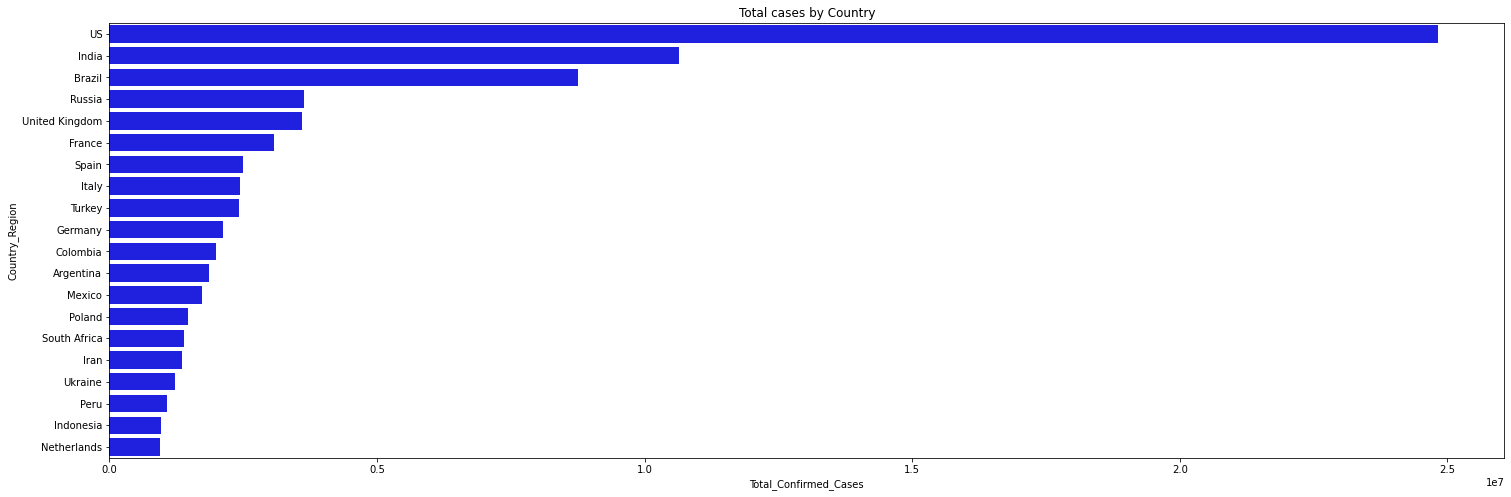

In [35]:
# Create a plot

plt.figure(figsize=(25,8))

# Add title
plt.title("Total cases by Country")

#grouped_data=df.groupby('Country_Region').sum().reset_index()

#grouped_data=grouped_data.sort_values('Total_Confirmed_Cases', ascending=False)
#grouped_data
#y_pos = np.arange(len(bars))

g = sns.barplot(x="Total_Confirmed_Cases", y="Country_Region", data=sorted_data,
            color="b",label="Total")
           
    
#label="Total", aspect=.7,hue = "Country_Region",orient="v" , #errcolor='.26'
#sns.barplot(x = grouped_data['Total_Confirmed_Cases'], y=grouped_data)
#df['Total_Confirmed_Cases'].sum()

**What percentage is distribution of COVID cases around the world?**

In [36]:
sorted_data1=sorted_data.sort_values('Total_Confirmed_Cases', ascending=False)

fig = px.sunburst(
    data_frame = sorted_data1,
    path = ['Country_Region', 'Total_Confirmed_Cases', 'Total_Recovered_Cases'],
    values = 'Total_Confirmed_Cases',
    hover_name= 'Country_Region',
    #color = "Country_Region",
    color_discrete_sequence=px.colors.qualitative.Pastel,
    maxdepth = -1,
    branchvalues='remainder'
)

fig.update_traces(textinfo='label+percent root')
fig.update_layout(margin=dict(t=0, l=0, r=0, b=0))


fig.show()

**Which country has most Active COVID cases?**

In [37]:
sorted_data_active = sorted_data.sort_values('Remaining_Confirmed_Cases', ascending=False)

sorted_data_active = sorted_data_active.head(35)

#sorted_data_active

In [38]:
fig = px.bar(sorted_data_active, x='Country_Region', y='Remaining_Confirmed_Cases', 
             text='Remaining_Confirmed_Cases', title = 'Most Active Cases around the World')

fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')

fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')#, yaxis=dict(title='USD (millions)')

fig.show()
#py.offline.iplot(fig)

**Which Country has most number of deaths from COVID?**

In [39]:
sorted_data_deaths=sorted_data.sort_values('Total_Fatalities', ascending=False)

sorted_data_death = sorted_data_deaths.head(35)

#sorted_data_death

In [40]:
fig = px.bar(sorted_data_death, x='Country_Region', y='Total_Fatalities', 
             text='Total_Fatalities', title = 'Most Death Cases around the World')

fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')

fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')

fig.show()

**Compare Confirmed Cases vs Total Recovered vs Total Deaths for Top 30 countries**

In [41]:
total_new_cases = df.groupby('Country_Region')['Country_Region', 
                                               'Total_Recovered_Cases', 'Total_Confirmed_Cases','Total_Fatalities'].max()#.reset_index()
total_new_cases=total_new_cases.sort_values('Total_Confirmed_Cases', ascending = False)
total_new_cases=total_new_cases.head(35)
#total_new_cases

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [42]:
fig = go.Figure()

fig.add_trace(go.Bar(x=total_new_cases.Country_Region,
                y=total_new_cases.Total_Confirmed_Cases,
                name='Confirmed',
                marker_color='rgb(94, 102, 145)',
                #hovertemplate = 'Confirmed:%{y:.2f}',
                ))
fig.add_trace(go.Bar(x=total_new_cases.Country_Region,
                y=total_new_cases.Total_Recovered_Cases,
                name='Recovered',
                marker_color='rgb(130, 115, 101)'
                ))

fig.add_trace(go.Bar(x=total_new_cases.Country_Region,
                y=total_new_cases.Total_Fatalities,
                name='Deaths',
                marker_color='rgb(36, 6, 6)'
                     
                ))

fig.update_layout(
    title='Total Cases vs. Total Recovered',
    xaxis_tickfont_size=10,
    yaxis=dict(
        title='COVID-19 Cases',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=1,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1 # gap between bars of the same location coordinate.
)

fig.show()

**Compare Rate of Recovery vs Rate of Death for each Country**

In [43]:
temp = df.groupby('Country_Region')['Country_Region', 'Total_Fatalities', 'Total_Recovered_Cases', 
                                    'Total_Confirmed_Cases'].max()

temp['Rate_of_Deaths'] = round(temp['Total_Fatalities']/temp['Total_Confirmed_Cases'], 3)*100
temp['Rate_of_Recovery'] = round(temp['Total_Recovered_Cases']/temp['Total_Confirmed_Cases'], 3)*100

temp = temp.sort_values('Total_Confirmed_Cases', ascending=False)

temp = temp.head(35)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [44]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=temp.Country_Region,
                         y=temp.Rate_of_Recovery,
                         mode='lines',
                         name='Recovery Rate',
                         marker_color='rgb(94, 173, 81)'))

fig.add_trace(go.Scatter(x=total_new_cases.Country_Region,
                     y=temp.Rate_of_Deaths,
                     mode='lines',
                     name='Death Rate',
                     marker_color='rgb(255, 0, 0)' ))

#data = [trace1, trace2]
fig.update_layout(
    title='Deaths vs Recovery based for the Countries having highest number of Cases',
    xaxis_tickfont_size=10,
    yaxis=dict(
        title='Percentage',
        zeroline = True,
        showline = True,
        titlefont_size=16,
        tickfont_size=14))
              
#fig = dict(data = data, layout = layo`aaut)

#fig.show()